# Neural Network for kids 🧒

## importing libraries

In [186]:
import torch

## creating basic function

In [187]:
def f(w):
    return 2*w

C:\Users\sriram\AppData\Local\Temp\ipykernel_6124\3816062301.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  n = torch.range(-10,10)


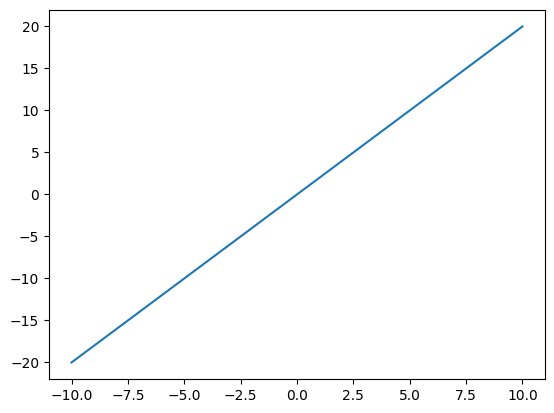

In [188]:
import matplotlib.pyplot as plt
n = torch.range(-10,10)
y = f(n)
plt.plot(n,y)

## using with libraries

In [214]:
w = torch.tensor(2.0) ; w.requires_grad=True
f(w)

tensor(4., grad_fn=<MulBackward0>)

In [215]:
y = 8

In [216]:
pred = f(w)
pred.retain_grad()
pred.grad

In [217]:
loss = y - pred 
loss.retain_grad()

In [218]:
loss.backward()
loss.grad

tensor(1.)

In [219]:
w.grad# note this value

tensor(-2.)

In [220]:
w.data -= 0.1* w.grad

In [221]:
pred = f(w)
pred

tensor(4.4000, grad_fn=<MulBackward0>)

In [222]:
w

tensor(2.2000, requires_grad=True)

In [180]:
w = torch.tensor(2.0);w.requires_grad=True
x = 2
y = 8

In [223]:
for _ in range(10):
    pred = f(w)
    
    loss = y-pred
    
    w.grad = None
    
    loss.backward()
    
    w.data -= 0.1 * w.grad
    
    pred = f(w)
    
    loss = y-pred
    print(f"loss is  {loss}")

loss is  3.1999998092651367
loss is  2.799999713897705
loss is  2.3999996185302734
loss is  1.9999995231628418
loss is  1.5999994277954102
loss is  1.1999993324279785
loss is  0.7999992370605469
loss is  0.39999914169311523
loss is  -9.5367431640625e-07
loss is  -0.40000057220458984


In [224]:
f(w).item(),w.item()

(8.40000057220459, 4.200000286102295)

Doing By hand without any libraries

step by step and automatic 

## Step By Step

In [170]:
w = 2
x = 2

In [172]:
pred=  f(w)
pred

4

In [174]:
loss = y-pred
loss

20

In [175]:
w_grad = -2
w_grad

-2

In [176]:
w -= 0.1*w_grad
w

2.2

In [177]:
pred = f(w)
pred

4.4

In [178]:
def loss(y,pred):
    return y - pred

In [179]:
l = loss(y,pred)
l

19.6

## automating the process again

In [85]:
import time

In [97]:
def f(w):
    return x*w

In [108]:
def gradient_for_multiply(companion,prev_rate_of_change):
    return companion * prev_rate_of_change

In [164]:
w = 2
x = 2
y = 24
h = 0.1

In [165]:
for _ in range(50):
    pred = f(w)
    w_grad = gradient_for_multiply(x,-1)
    w -= h * w_grad
    pred = f(w)
    loss = y - pred
    time.sleep(0.5)
    print(f"loss is  {loss}")

loss is  19.6
loss is  19.2
loss is  18.799999999999997
loss is  18.4
loss is  18.0
loss is  17.599999999999998
loss is  17.199999999999996
loss is  16.799999999999997
loss is  16.4
loss is  15.999999999999996
loss is  15.599999999999996
loss is  15.199999999999996
loss is  14.799999999999995
loss is  14.399999999999995
loss is  13.999999999999995
loss is  13.599999999999994
loss is  13.199999999999994
loss is  12.799999999999994
loss is  12.399999999999993
loss is  11.999999999999993
loss is  11.599999999999993
loss is  11.199999999999992
loss is  10.799999999999992
loss is  10.399999999999991
loss is  9.999999999999991
loss is  9.59999999999999
loss is  9.19999999999999
loss is  8.79999999999999
loss is  8.39999999999999
loss is  7.999999999999989
loss is  7.599999999999991
loss is  7.199999999999992
loss is  6.799999999999994
loss is  6.399999999999995
loss is  5.9999999999999964
loss is  5.599999999999998
loss is  5.199999999999999
loss is  4.800000000000001
loss is  4.400000000000

In [166]:
w

11.999999999999991

In [167]:
pred = f(w)
pred

23.999999999999982

## the calculas behind the scene 

the formula for derivative is 

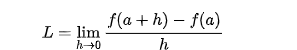


it's a rate of change of value(or a input) in a given point 

**For Multiplication** 

`2`*`3`

the rate of change of `3` is going to be always `2`

and vice versa (for `2` it's going to be `3`)

so if i changed the `3` into `4` the rate of change is still going to be 2 no matter what

and yes vice versa

**For Minus**

we are going to get `-1`

it's rate of change is always going to be low then a previous number

and we can find this using that scary formula tooo 😂

In [252]:
w = 2
x = 6
y = 8
h = 0.1

for prediction formula we created before

`w*x`

In [253]:
#for multiplication x = 2,w =2
((x*(w+h)) - (x*w))/h

6.000000000000014

In [254]:
p = x*w
p

12

for loss formula we created before 

`loss = y - pred`

In [255]:
#for minus y = 8,p = 4,h = 0.1
((y-(p+h)) - (y-p))/h

-0.9999999999999964

and that's the gradient are calculas part of the neural network

the fundamentals are not gonna change

and this is the fundamentals 🥳

loss = y - pred 

dl/dl = 1

dl/dx = w

dl/dw = x

## Even More Automation

In [160]:
def f(w):
    return x*w

In [161]:
w = 1
x = 2
y = 24
lr = 0.1
i = 0
loss = y - f(w)
print(loss)
while loss>0.1:
    
    i+=1
    #forward pass
    pred = f(w)
    
    loss = y-pred
    
    if i % 10 == 0:
        print("loss is : ",loss)
        
    #backward pass 
    w_grad = gradient_for_multiply(x,-1)
    
    w -= lr * w_grad

22
loss is :  18.0
loss is :  13.999999999999996
loss is :  9.999999999999993
loss is :  6.0
loss is :  2.000000000000014


In [162]:
w

11.99999999999999

In [163]:
round(f(w))

24